In [11]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os,sys
from PIL import Image
sys.path.append("..")

from utils import *
from errors import *

from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks
from scipy import ndimage as ndi
from sklearn.preprocessing import StandardScaler

In [12]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches


Loading 20 images from images
Loading 20 images from groundtruth
Color images:
(11, 400, 400, 3)
(9, 400, 400, 3)
Gray images:
(11, 400, 400)
(9, 400, 400)


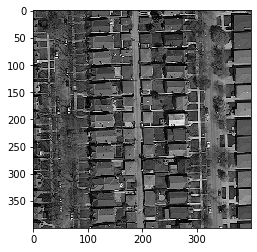

In [13]:
# Loaded a set of images
root_dir = "../../data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(20, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images from images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images from groundtruth")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]

n_train = 11 # Only use 11 images for training
n_test = n - n_train
imgs_tr = [imgs[i] for i in range(n_train)]
imgs_te = [imgs[i] for i in range(n_train, n)]
imgs_gray_tr = [rgb2gray(imgs[i]) for i in range(n_train)]
imgs_gray_te = [rgb2gray(imgs[i]) for i in range(n_train, n)]

print("Color images:")
print(np.shape(imgs_tr))
print(np.shape(imgs_te))
print("Gray images:")
print(np.shape(imgs_gray_tr))
print(np.shape(imgs_gray_te))
plt.imshow(imgs_gray_tr[0], cmap='Greys_r')

In [18]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

In [19]:
h, theta, d = hough_line(imgs_gray_tr[0], theta=tested_angles)

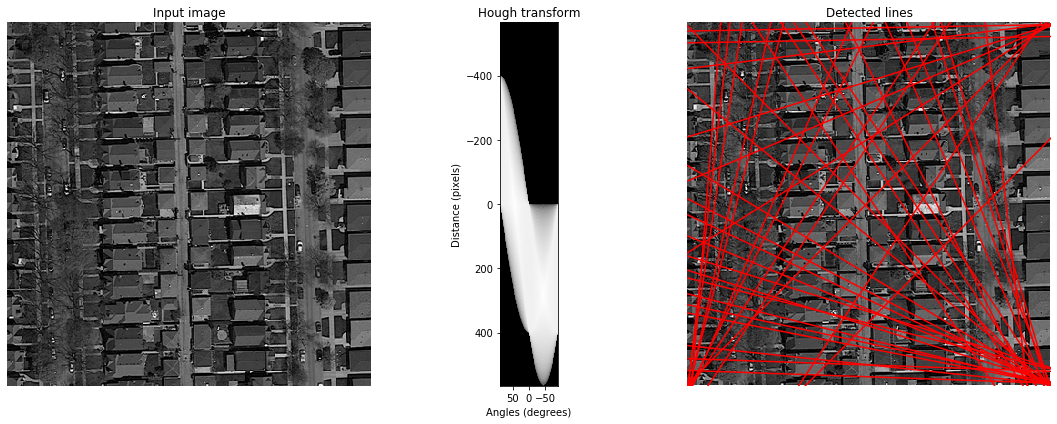

In [20]:
# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(imgs_gray_tr[0], cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(imgs_gray_tr[0], cmap=cm.gray)
origin = np.array((0, imgs_gray_tr[0].shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((imgs_gray_tr[0].shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [1]:
# As you can see road are not appearing at all :)